In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_processed = pd.read_csv('./data/processed_data.csv')
df_processed.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


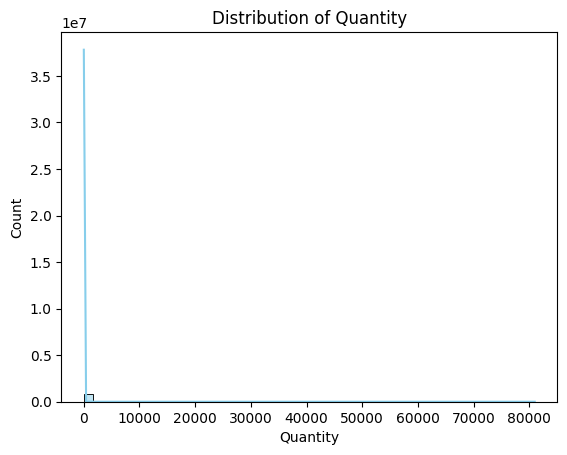

In [3]:
# Histogram Quantity
sns.histplot(df_processed['Quantity'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()



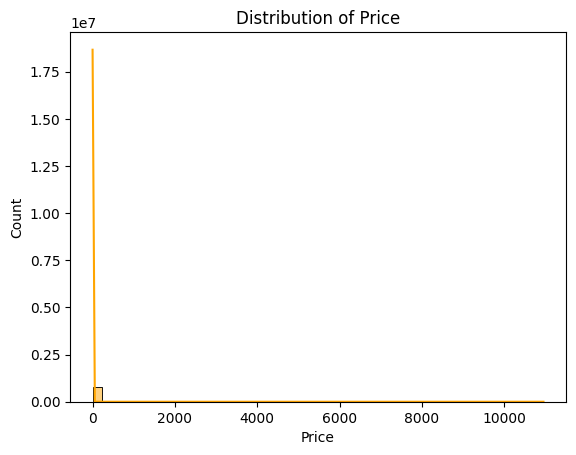

In [4]:
# Histogram Price
sns.histplot(df_processed['Price'], bins=50, kde=True, color='orange')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

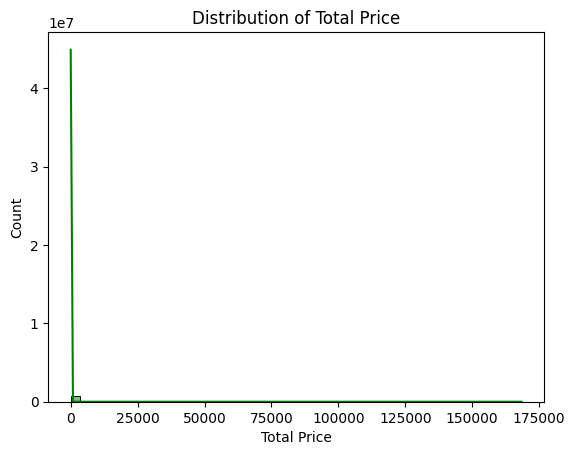

In [5]:
# Histogram TotalAmount
sns.histplot(df_processed['TotalPrice'], bins=50, kde=True, color='green')
plt.title('Distribution of Total Price')
plt.xlabel('Total Price')
plt.ylabel('Count')
plt.show()

Các số liệu có vấn đề bất thường tiếp theo là thể hiện biểu đồ Boxplot để dễ dàng theo dỗi hơn

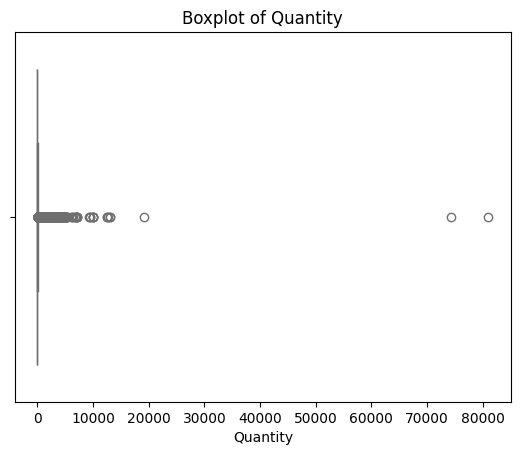

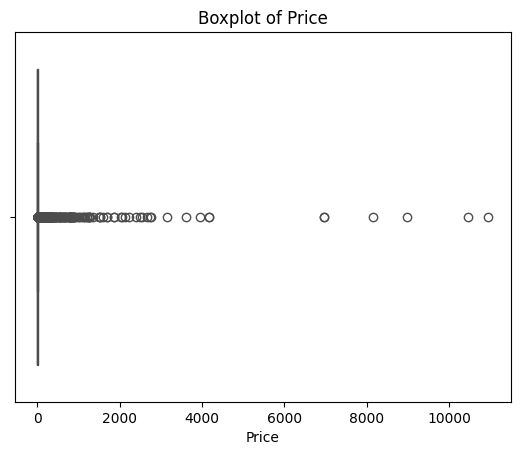

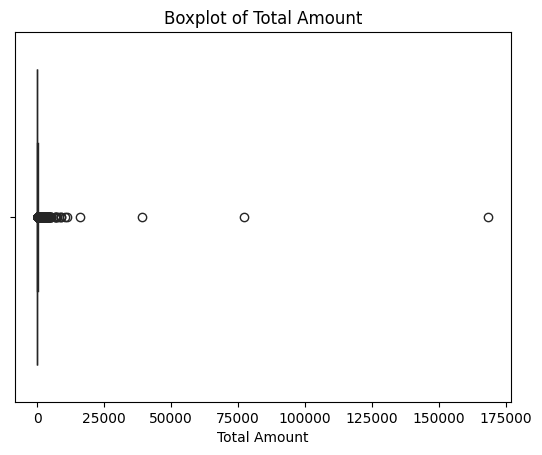

In [6]:
# Boxplot Quantity
sns.boxplot(x=df_processed['Quantity'], color='skyblue')
plt.title('Boxplot of Quantity')
plt.xlabel('Quantity')
plt.show()

# Boxplot Price
sns.boxplot(x=df_processed['Price'], color='orange')
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

# Boxplot TotalAmount
sns.boxplot(x=df_processed['TotalPrice'], color='green')
plt.title('Boxplot of Total Amount')
plt.xlabel('Total Amount')
plt.show()

Xử dụng Tukey’s Rule để xử lý outlier

In [7]:
#defining funcation to remove outliers w.r.t its thresholds
def outlier_thresholds(dataframe, variable):
    Q1 = dataframe[variable].quantile(0.25)
    Q3 = dataframe[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return upper_limit, lower_limit

def replace_with_threshold(dataframe, variable):
    upper_limit, lower_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[dataframe[variable] > upper_limit, variable] = upper_limit
    dataframe.loc[dataframe[variable] < lower_limit, variable] = lower_limit

replace_with_threshold(df_processed, 'Quantity')
replace_with_threshold(df_processed, 'Price')
replace_with_threshold(df_processed, 'TotalPrice')

Sau đó visualize biểu đồ lại xem còn sự bất thường nào không

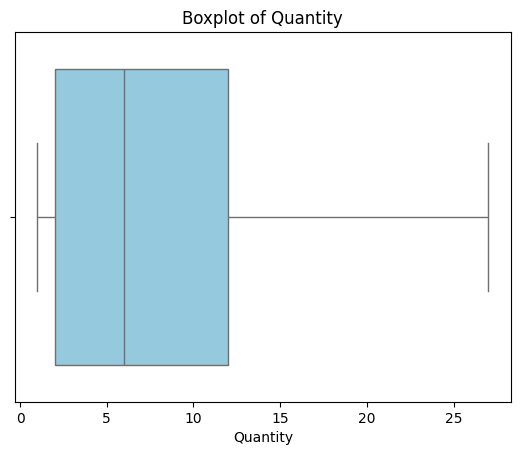

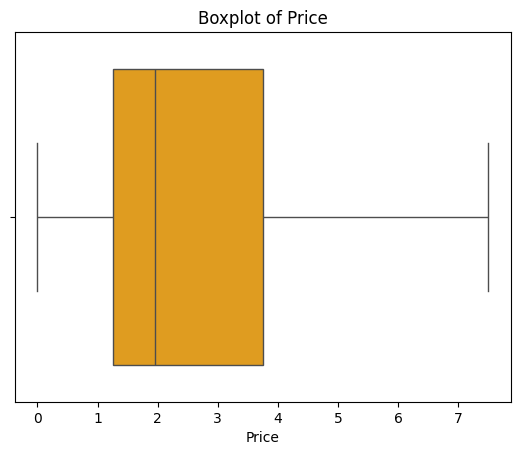

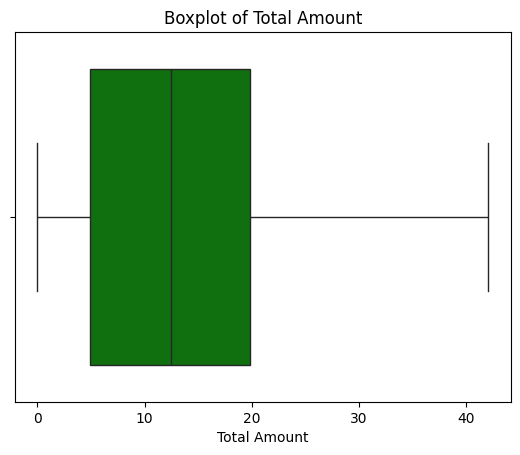

In [8]:
# Boxplot Quantity
sns.boxplot(x=df_processed['Quantity'], color='skyblue')
plt.title('Boxplot of Quantity')
plt.xlabel('Quantity')
plt.show()

# Boxplot Price
sns.boxplot(x=df_processed['Price'], color='orange')
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

# Boxplot TotalAmount
sns.boxplot(x=df_processed['TotalPrice'], color='green')
plt.title('Boxplot of Total Amount')
plt.xlabel('Total Amount')
plt.show()

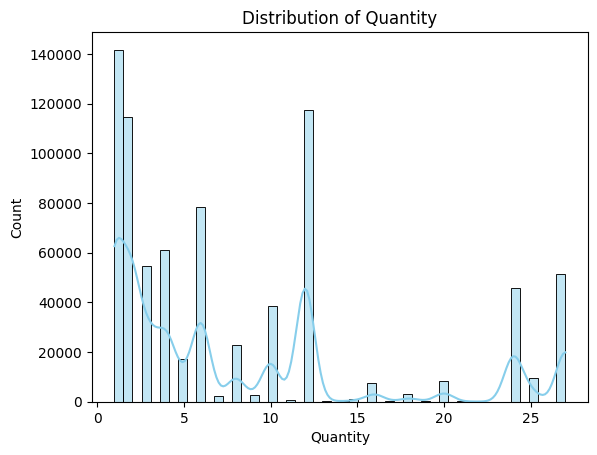

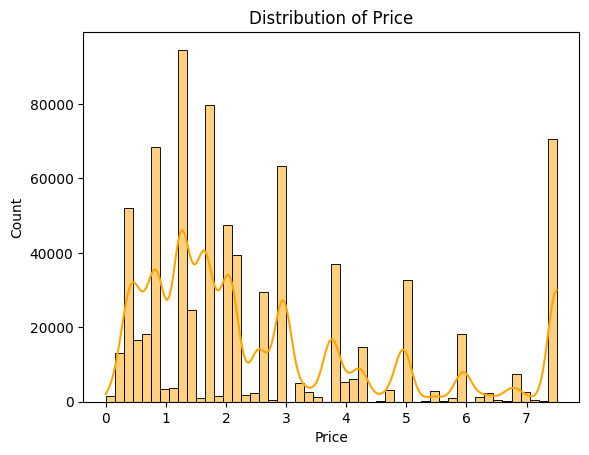

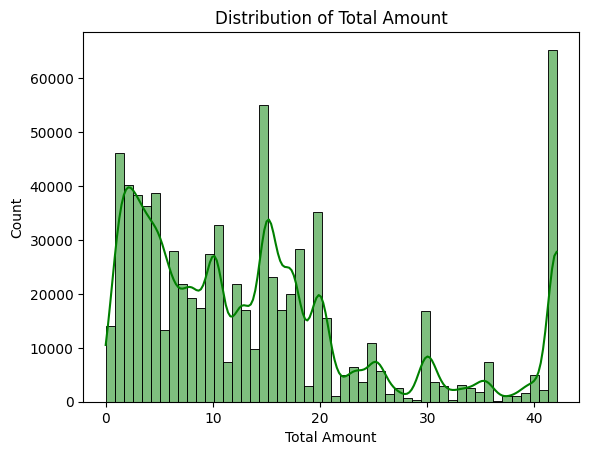

In [9]:
# Histogram Quantity
sns.histplot(df_processed['Quantity'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

# Histogram Price
sns.histplot(df_processed['Price'], bins=50, kde=True, color='orange')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Histogram TotalAmount
sns.histplot(df_processed['TotalPrice'], bins=50, kde=True, color='green')
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Count')
plt.show()

In [10]:
df_processed['InvoiceDate'] = pd.to_datetime(df_processed['InvoiceDate'])

# Các mốc thời gian cần thiết
df_processed['Year'] = df_processed['InvoiceDate'].dt.year
df_processed['Month'] = df_processed['InvoiceDate'].dt.month
df_processed['Day'] = df_processed['InvoiceDate'].dt.day
df_processed['Hour'] = df_processed['InvoiceDate'].dt.hour
df_processed['Weekday'] = df_processed['InvoiceDate'].dt.day_name()
df_processed['DateOnly'] = df_processed['InvoiceDate'].dt.date  # chỉ lấy ngày


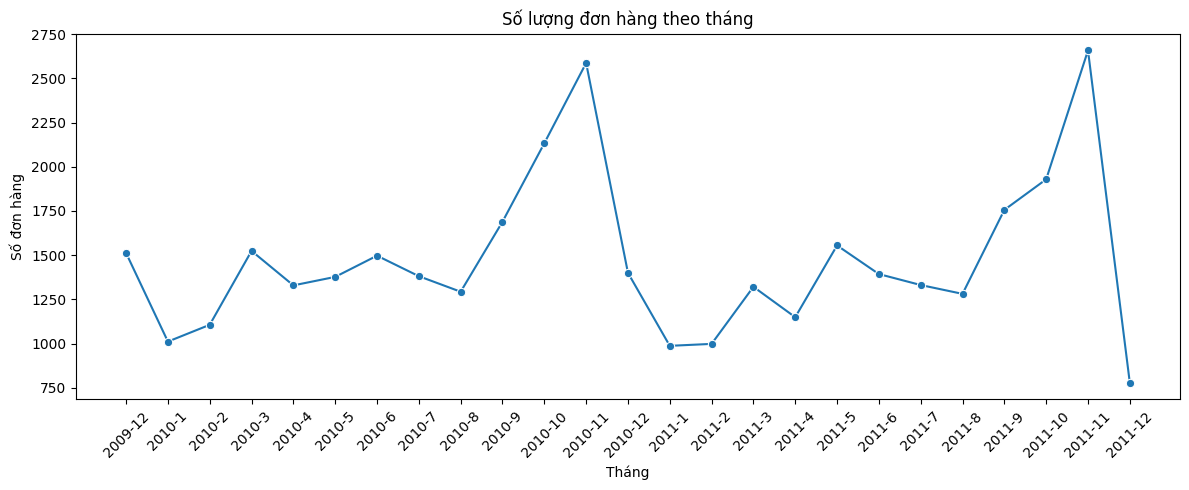

In [11]:
monthly_orders = df_processed.groupby(['Year', 'Month'])['Invoice'].nunique().reset_index()
monthly_orders['YearMonth'] = monthly_orders['Year'].astype(str) + '-' + monthly_orders['Month'].astype(str)

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_orders, x='YearMonth', y='Invoice', marker='o')
plt.xticks(rotation=45)
plt.title('Số lượng đơn hàng theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số đơn hàng')
plt.tight_layout()
plt.show()


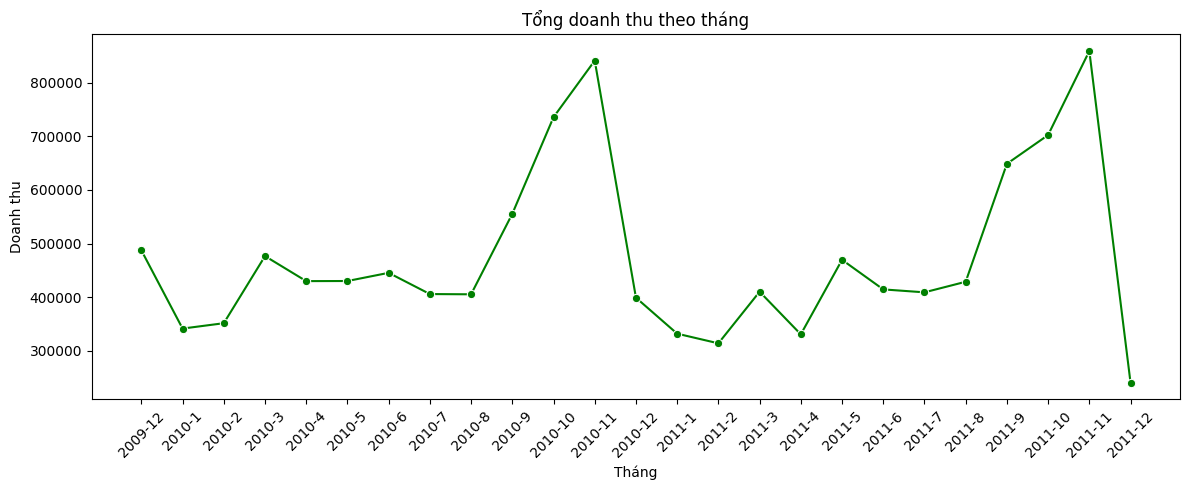

In [12]:
monthly_sales = df_processed.copy()
monthly_sales['TotalPrice'] = monthly_sales['Quantity'] * monthly_sales['Price']
sales_by_month = monthly_sales.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()
sales_by_month['YearMonth'] = sales_by_month['Year'].astype(str) + '-' + sales_by_month['Month'].astype(str)

plt.figure(figsize=(12, 5))
sns.lineplot(data=sales_by_month, x='YearMonth', y='TotalPrice', marker='o', color='green')
plt.xticks(rotation=45)
plt.title('Tổng doanh thu theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Doanh thu')
plt.tight_layout()
plt.show()


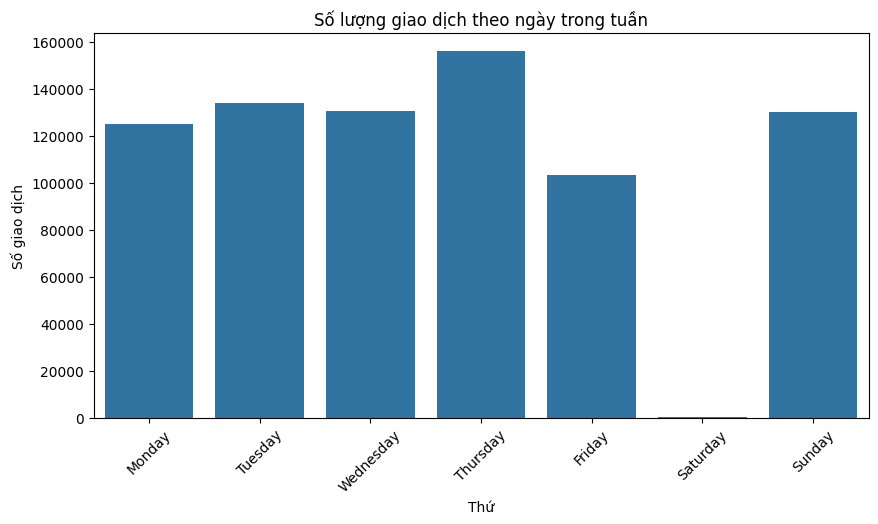

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_processed, x='Weekday', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Số lượng giao dịch theo ngày trong tuần')
plt.xlabel('Thứ')
plt.ylabel('Số giao dịch')
plt.xticks(rotation=45)
plt.show()


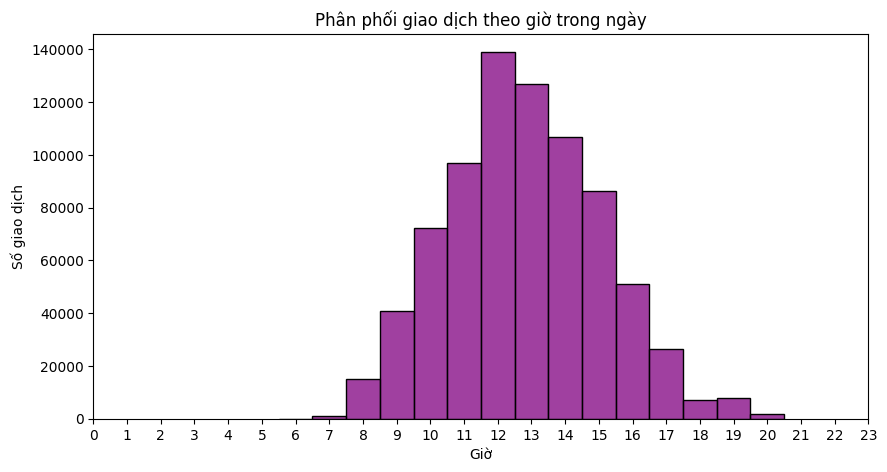

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(
    df_processed['Hour'],
    bins=range(25),        
    kde=False,
    color='purple',
    discrete=True          
)
plt.title('Phân phối giao dịch theo giờ trong ngày')
plt.xlabel('Giờ')
plt.ylabel('Số giao dịch')
plt.xticks(range(0, 24))    
plt.show()

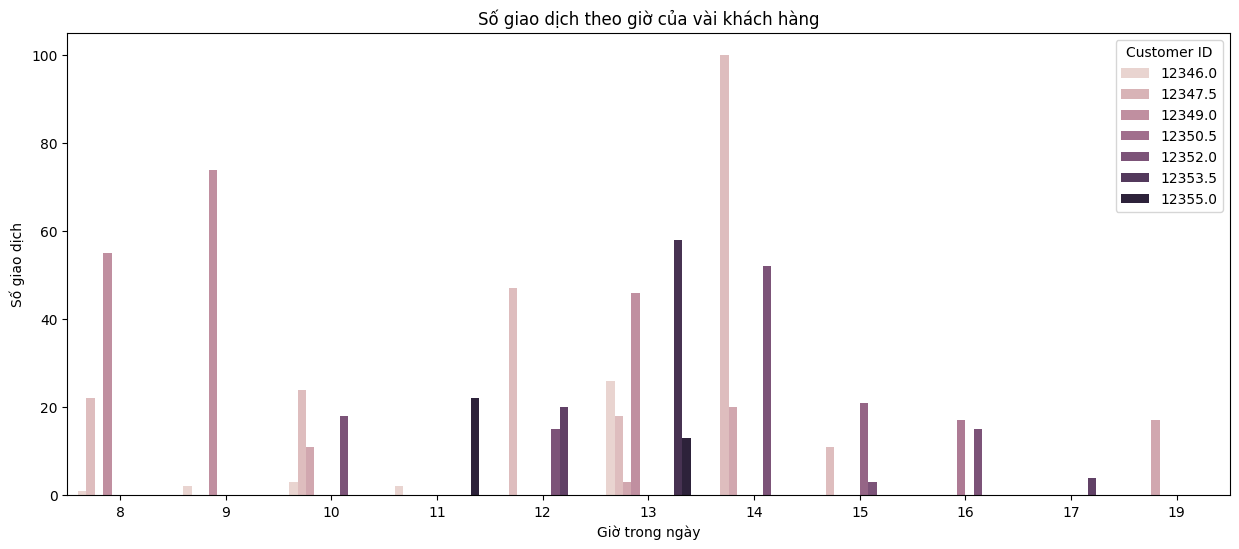

In [15]:

df_grouped = df_processed.groupby(['Customer ID', 'Hour']).size().reset_index(name='TransactionCount')

customers_to_plot = df_grouped['Customer ID'].unique()[:10]
df_sub = df_grouped[df_grouped['Customer ID'].isin(customers_to_plot)]

plt.figure(figsize=(15,6))
sns.barplot(x='Hour', y='TransactionCount', hue='Customer ID', data=df_sub)
plt.title('Số giao dịch theo giờ của vài khách hàng')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số giao dịch')
plt.show()


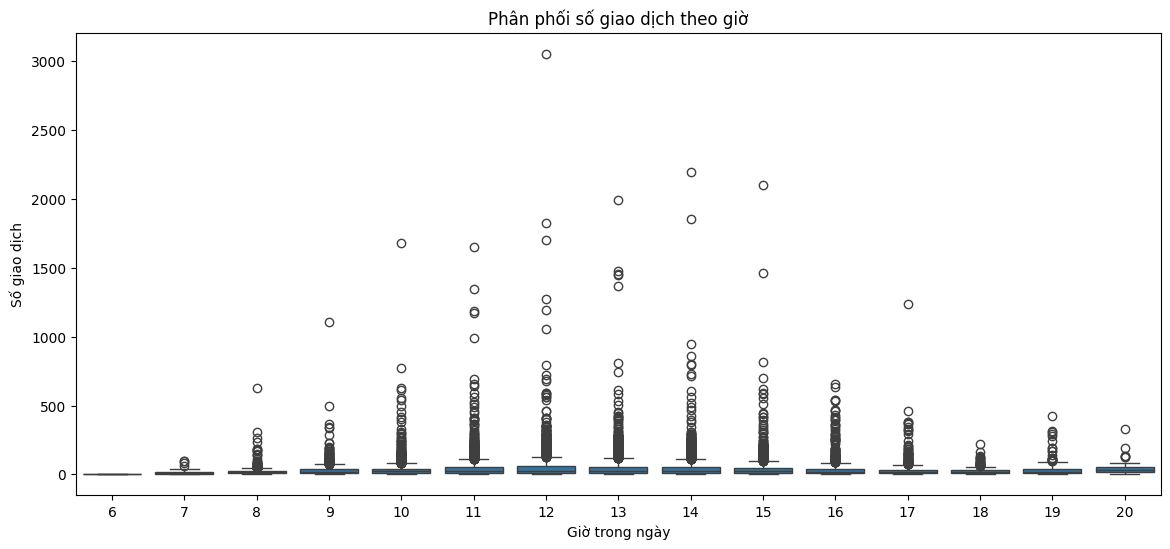

In [16]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Hour', y='TransactionCount', data=df_grouped)
plt.title('Phân phối số giao dịch theo giờ')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số giao dịch')
plt.show()


C:\Users\dangth\AppData\Local\Temp\ipykernel_13472\2170000201.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='StockCode', data=top_products, palette='viridis')


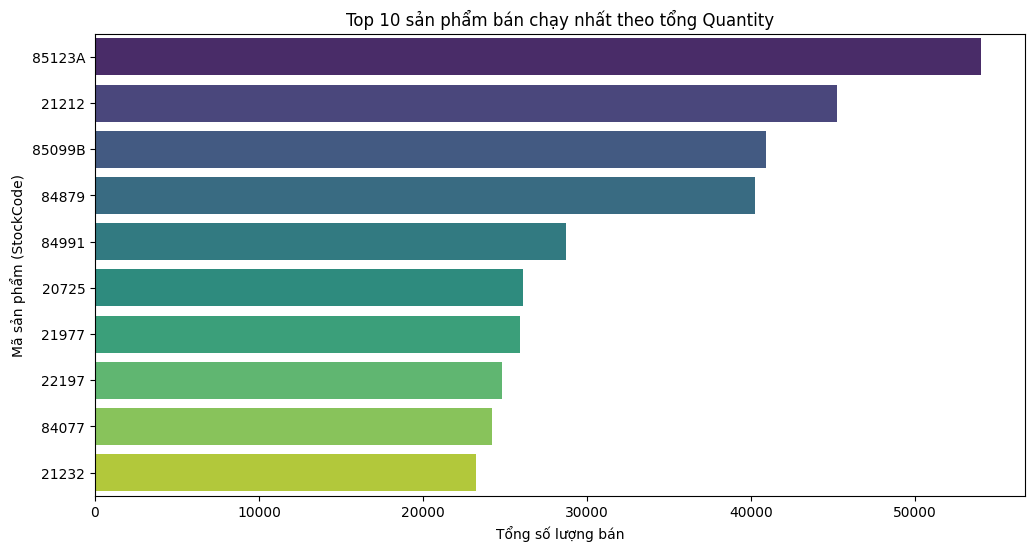

In [17]:

# Tính tổng số lượng bán theo sản phẩm
product_sales = df_processed.groupby('StockCode')['Quantity'].sum().reset_index()

# Lấy top 10 sản phẩm bán chạy nhất
top_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Quantity', y='StockCode', data=top_products, palette='viridis')
plt.title('Top 10 sản phẩm bán chạy nhất theo tổng Quantity')
plt.xlabel('Tổng số lượng bán')
plt.ylabel('Mã sản phẩm (StockCode)')
plt.show()


C:\Users\dangth\AppData\Local\Temp\ipykernel_13472\2975037486.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='StockCode', data=top_revenue_products, palette='rocket')


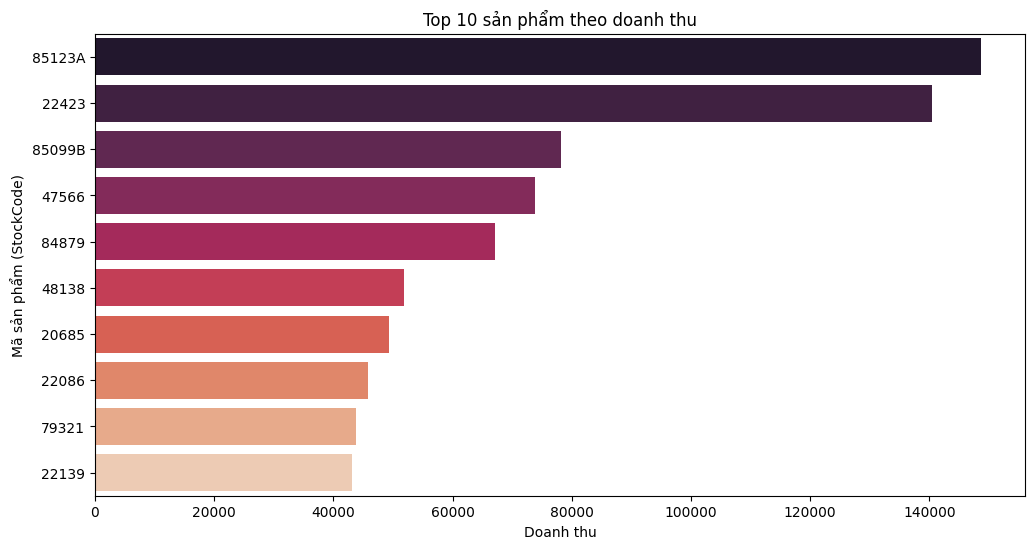

In [18]:
# Tính tổng doanh thu = sum(Quantity * Price) theo sản phẩm
df_processed['Revenue'] = df_processed['Quantity'] * df_processed['Price']
product_revenue = df_processed.groupby('StockCode')['Revenue'].sum().reset_index()

top_revenue_products = product_revenue.sort_values(by='Revenue', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Revenue', y='StockCode', data=top_revenue_products, palette='rocket')
plt.title('Top 10 sản phẩm theo doanh thu')
plt.xlabel('Doanh thu')
plt.ylabel('Mã sản phẩm (StockCode)')
plt.show()


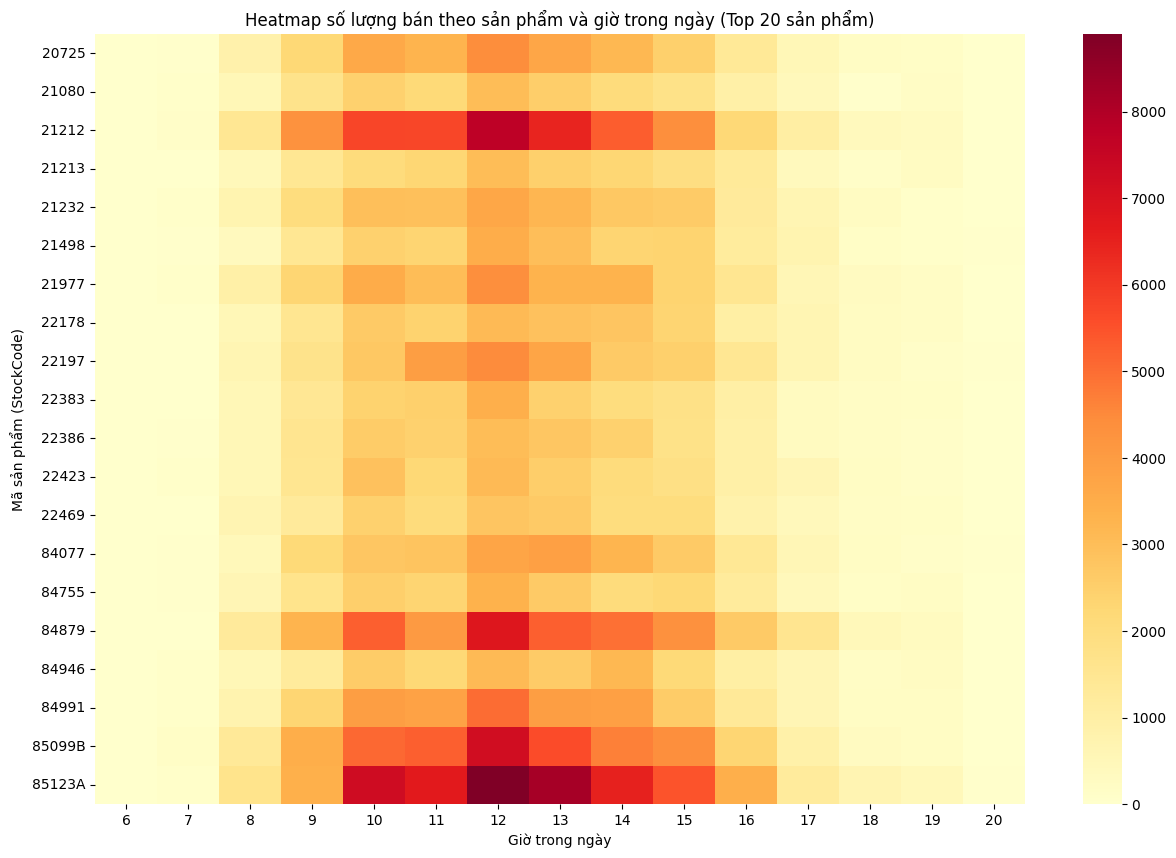

In [19]:
# Tính tổng số lượng theo sản phẩm và giờ giao dịch
product_hour = df_processed.groupby(['StockCode', 'Hour'])['Quantity'].sum().reset_index()

# Pivot thành bảng ma trận
pivot = product_hour.pivot(index='StockCode', columns='Hour', values='Quantity').fillna(0)

# Lấy top 20 sản phẩm bán chạy nhất để dễ nhìn
top_20_products = product_sales.sort_values(by='Quantity', ascending=False).head(20)['StockCode']
pivot_top20 = pivot.loc[pivot.index.isin(top_20_products)]

plt.figure(figsize=(15,10))
sns.heatmap(pivot_top20, cmap='YlOrRd')
plt.title('Heatmap số lượng bán theo sản phẩm và giờ trong ngày (Top 20 sản phẩm)')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Mã sản phẩm (StockCode)')
plt.show()


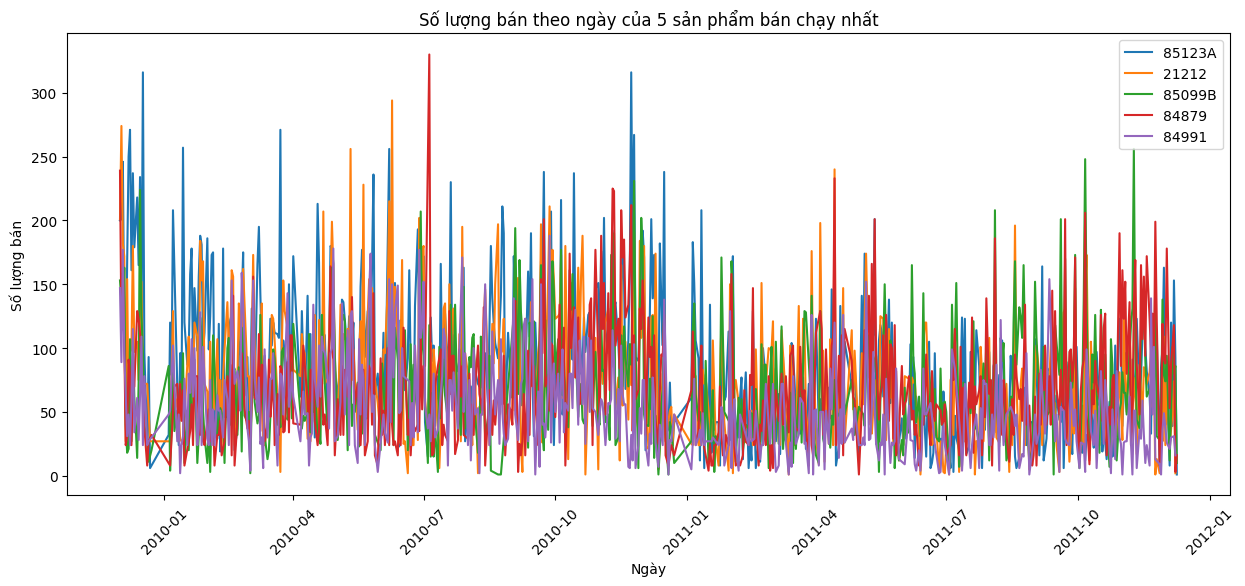

In [20]:
df_processed['DateOnly'] = df_processed['InvoiceDate'].dt.date

product_day = df_processed.groupby(['StockCode', 'DateOnly'])['Quantity'].sum().reset_index()

top5_products = product_sales.sort_values(by='Quantity', ascending=False).head(5)['StockCode']

plt.figure(figsize=(15,6))
for product in top5_products:
    data = product_day[product_day['StockCode'] == product]
    plt.plot(data['DateOnly'], data['Quantity'], label=product)

plt.title('Số lượng bán theo ngày của 5 sản phẩm bán chạy nhất')
plt.xlabel('Ngày')
plt.ylabel('Số lượng bán')
plt.legend()
plt.xticks(rotation=45)
plt.show()


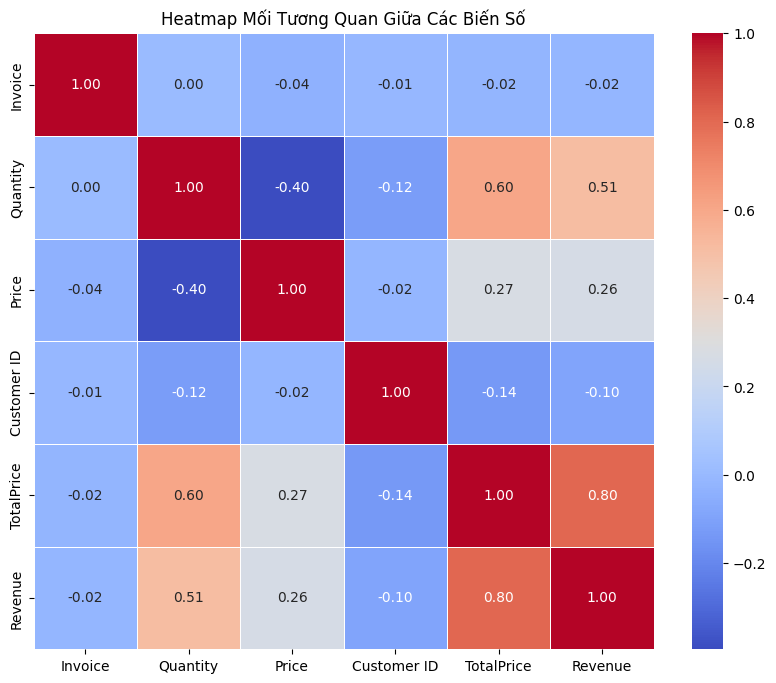

In [21]:
numeric_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns

# Tính ma trận tương quan
corr_matrix = df_processed[numeric_cols].corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Mối Tương Quan Giữa Các Biến Số')
plt.show()

In [22]:
df_processed.to_csv('./data/customer_features_cleaned.csv', index=False)